In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y dataset')

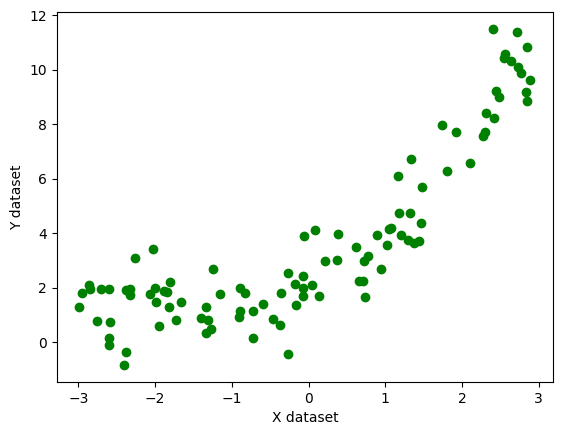

In [2]:
X=6*np.random.rand(100,1)-3
y=0.5*X**2 + 1.5*X+ 2 +np.random.randn(100,1)

plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [5]:
regression.fit(X_train,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
sscore=r2_score(y_test,regression.predict(X_test))

In [7]:
sscore

0.7315667818735412

Text(0.5, 0, 'X')

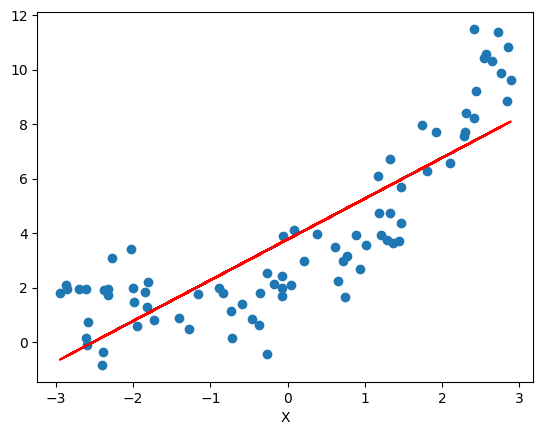

In [8]:
#vizualize the model
plt.plot(X_train,regression.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X")

In [9]:
from sklearn.preprocessing import PolynomialFeatures

In [10]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [11]:
X_train_poly

array([[ 1.00000000e+00, -2.32796089e+00,  5.41940192e+00],
       [ 1.00000000e+00, -2.70475083e+00,  7.31567707e+00],
       [ 1.00000000e+00, -3.54789158e-01,  1.25875347e-01],
       [ 1.00000000e+00, -4.65694852e-01,  2.16871696e-01],
       [ 1.00000000e+00,  1.74018055e+00,  3.02822835e+00],
       [ 1.00000000e+00, -1.99152454e+00,  3.96616998e+00],
       [ 1.00000000e+00,  2.55042409e+00,  6.50466305e+00],
       [ 1.00000000e+00, -8.90962524e-01,  7.93814218e-01],
       [ 1.00000000e+00,  1.46957339e+00,  2.15964595e+00],
       [ 1.00000000e+00,  1.02123494e+00,  1.04292081e+00],
       [ 1.00000000e+00,  4.41470650e-02,  1.94896335e-03],
       [ 1.00000000e+00,  1.20749676e+00,  1.45804842e+00],
       [ 1.00000000e+00,  2.29556365e+00,  5.26961248e+00],
       [ 1.00000000e+00,  2.56392295e+00,  6.57370087e+00],
       [ 1.00000000e+00, -2.40214490e+00,  5.77030013e+00],
       [ 1.00000000e+00, -6.93425443e-02,  4.80838845e-03],
       [ 1.00000000e+00,  2.64553813e+00

In [12]:
from sklearn.metrics import r2_score
regression=LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred=regression.predict(X_test_poly)
sscore=r2_score(y_test,y_pred)
print(sscore)

#earlier the score was 0.78 now it is 0.93

0.9372395772070313


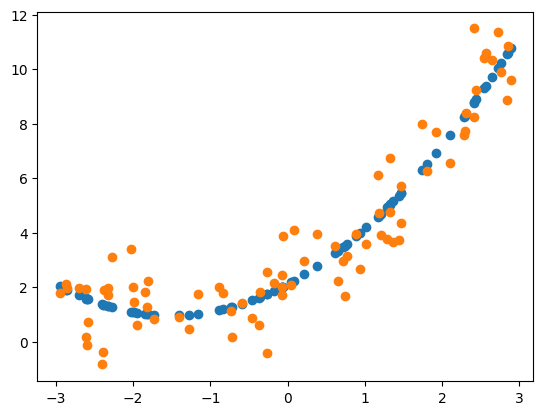

In [13]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [14]:
##PIPELINING CONCEPT

from sklearn.pipeline import Pipeline

In [34]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)

    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train)
    y_pred_new=poly_regression.predict(X_new)
    #plotting
    plt.plot(X_new,y_pred_new,'r',label="Degree"+str(degree),linewidth=2)
    plt.plot(X_train,y_train,"b.",linewidth=3)
    plt.plot(X_test,y_test,"g.",linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()

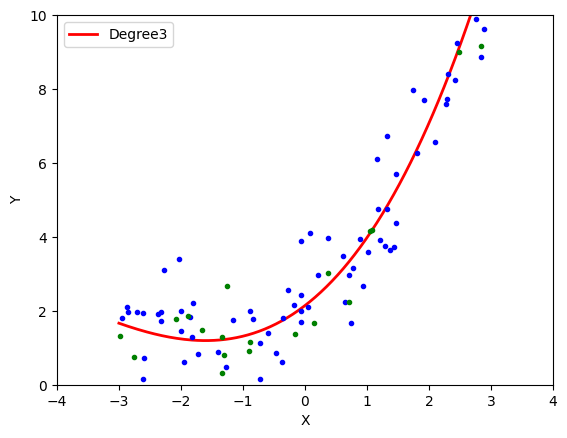

In [44]:
poly_regression(3)